# Upper Confidence Bound(UCB)

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

## Read Dataset

In [3]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

In [4]:
dataset

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0


## UCB Implementation

Step 1: At each rown n we consider two numbers for each model i: <br>N<sub>i</sub>(n)-no. of times model m<sub>i</sub> has been selected and,<br> R<sub>i</sub>(n) reward associated with model m<sub>i</sub>. <br>
Step 2: a) we compute average reward for model r<sub>i</sub>(n) = R<sub>i</sub>(n) / N<sub>i</sub>(n) <br>
b) Confidence Interval: delta<sub>i</sub>(n) = math.sqrt(3/2 * math.log(n + 1) / N<sub>i</sub>(n)) <br>
Step 3: Upper Confidence = Average Reward + delta_i

In [16]:
import math
N = len(dataset.index)
d = len(dataset.columns)
model_selected_times = [0] * d
model_selected_reward = [0] * d
model_selected = list()
total_reward = 0

for row in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if model_selected_times[i] > 0:
            average_reward = model_selected_reward[i] / model_selected_times[i]
            delta_i =  math.sqrt(3/2 * math.log(row + 1) / model_selected_times[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    model_selected_times[ad] += 1
    model_selected.append(ad)
    reward = dataset.values[row, ad]
    model_selected_reward[ad] += reward
    total_reward += reward

## Visualization

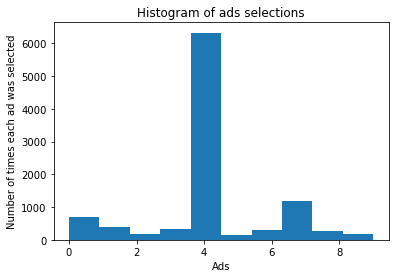

In [18]:
plt.hist(model_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

In [19]:
total_reward

2178

In [27]:
len(model_selected)

10000